In [1]:
import time

import torch
from diffusers import StableDiffusionPipeline
from huggingface_hub import login
from torch.amp.autocast_mode import autocast

DEVICE = 'cuda'

# モデルダウンロード先ディレクトリ
CACHE_DIR = 'cache/diffusers'

# Hugging Face Hubにログイン
#login(token='Hugging Face Token Id')

# モデルリポジトリ名
model_id = 'CompVis/stable-diffusion-v1-4'

if DEVICE == 'cuda':
    # VRAMフラグメント対策
    torch.cuda.memory._set_allocator_settings('max_split_size_mb:100')

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    cache_dir=CACHE_DIR,
    safety_checker=None)
pipe = pipe.to(DEVICE)


/home/sylx/project/anothergame/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sylx/project/anothergame/.venv/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  6.42it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffu

In [4]:
prompt = """
masterpiece,high quality,1 girl,full body,standing,extremely detailed face,
16years old girl,black hair,charcter design
"""

negative_prompt = """
flat color, flat shading, nsfw,(worst quality, low quality:1.4), interlocked fingers, zombie, sketch, comic
"""

image = pipe(prompt=prompt, negative_prompt=negative_prompt, guidance_scale=7.5).images[0]
# jupyter notebook上で画像を表示
from PIL import Image
import matplotlib.pyplot as plt

plt.imshow(image)

 70%|███████   | 35/50 [00:04<00:01,  8.01it/s]

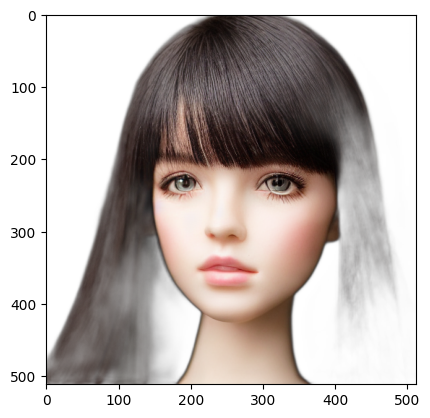

In [3]:
from rembg import remove

output = remove(image)
plt.imshow(output)